In [2]:
import geopandas as gpd
from pathlib import Path

from tree_detection_framework.evaluation.evaluate import match_points, assess_matches

# Overview

TODO: Explain

In [16]:
PROJECT_ROOT = Path("/ofo-share/species-prediction-project/intermediate/")

# Load field survey data (ground truth)
gt_paths = sorted((PROJECT_ROOT / "shifted_field_trees/").glob("*.gpkg"))
gt_pts = [gpd.read_file(gpkg_path) for gpkg_path in gt_paths]

# Load geometric tree detections, aligned with the field survey points
geo_paths = [
    PROJECT_ROOT / "detected_trees" / gpkg_path.stem / "tree_tops.gpkg"
    for gpkg_path in gt_paths
]
geo_pts = [gpd.read_file(gpkg_path) for gpkg_path in geo_paths]

# Find the canopy height models, aligned with the field survey points
chm_paths = [
    PROJECT_ROOT / "CHMs" / f"{gpkg_path.stem}.tif"
    for gpkg_path in gt_paths
]

# Load orthomosaic tree detections, aligned with the field survey points
# TODO

# Load multi-view tree detections, aligned with the field survey points
# TODO

2025-08-13 21:57:43,446 - INFO - Extracting treetop heights from CHM


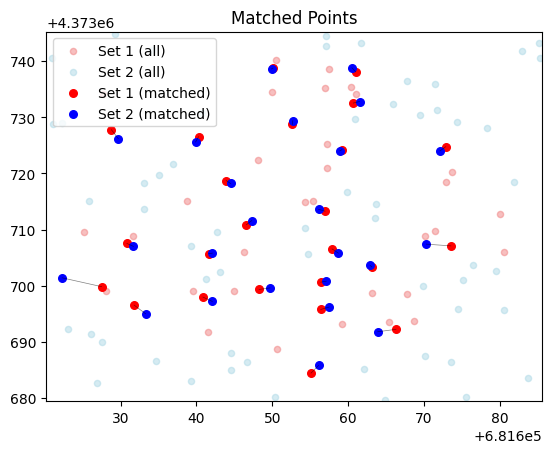

2025-08-13 21:57:44,166 - INFO - Extracting treetop heights from CHM


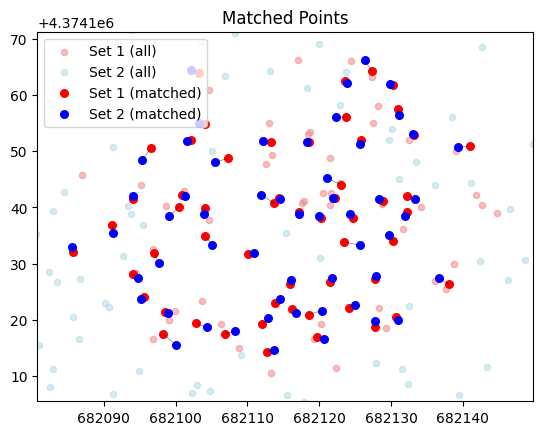

2025-08-13 21:57:44,528 - INFO - Extracting treetop heights from CHM


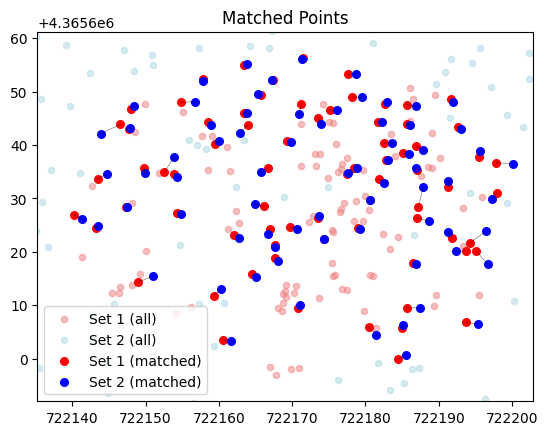

2025-08-13 21:57:44,904 - INFO - Extracting treetop heights from CHM


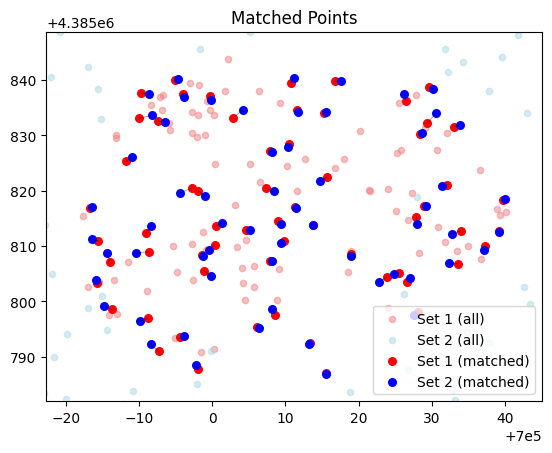

2025-08-13 21:57:45,455 - INFO - Extracting treetop heights from CHM


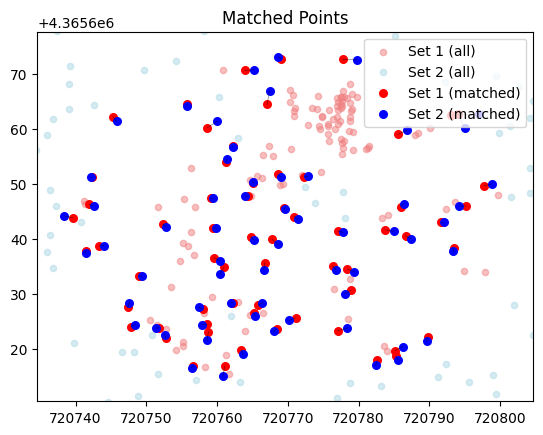

2025-08-13 21:57:45,810 - INFO - Extracting treetop heights from CHM


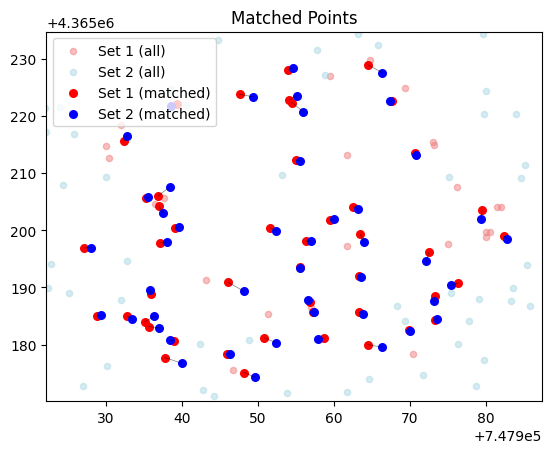

2025-08-13 21:57:46,152 - INFO - Extracting treetop heights from CHM


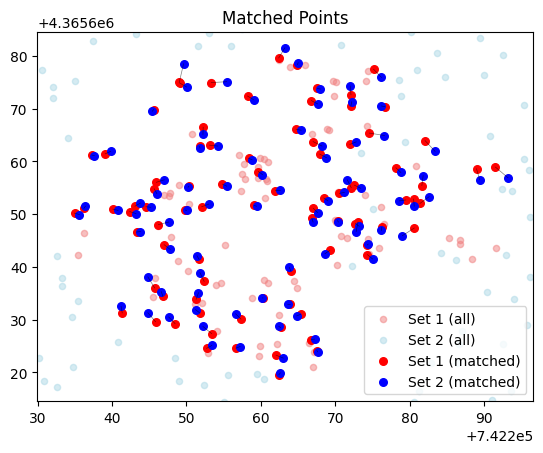

2025-08-13 21:57:46,575 - INFO - Extracting treetop heights from CHM


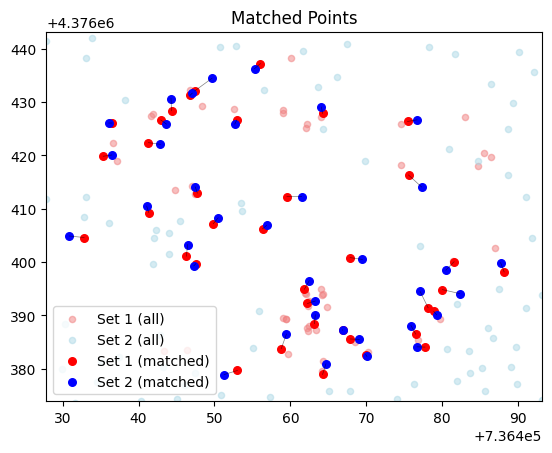

2025-08-13 21:57:46,935 - INFO - Extracting treetop heights from CHM


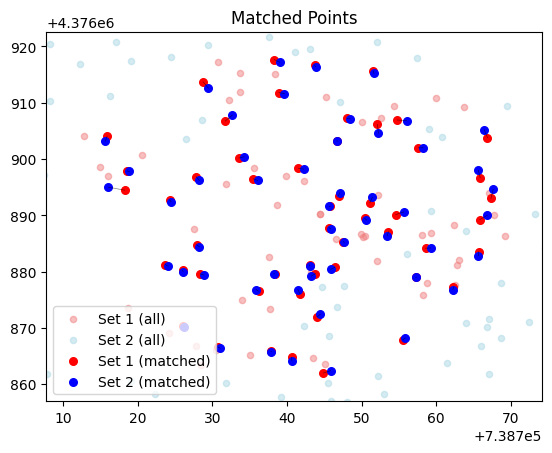

2025-08-13 21:57:47,264 - INFO - Extracting treetop heights from CHM


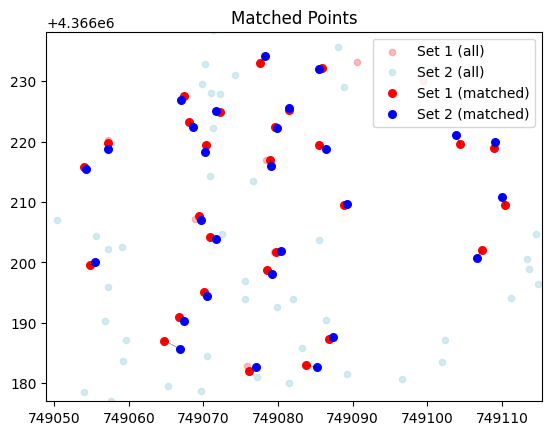

In [17]:
for ptsA, ptsB, chm_path in zip(gt_pts, geo_pts, chm_paths):
    match_points(
        ptsA,
        ptsB,
        height_column_1="height",
        fillin_method="chm",
        chm_path=chm_path,
        vis=True,
    )